In [27]:
#Vectorize
from sklearn.feature_extraction.text import TfidfVectorizer
sent = ('휴일 인 오늘도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.',
       '폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.')

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent)
print(tfidf_matrix)

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf)))

#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
a = cosine_similarity(tfidf_matrix[0:1],tfidf_matrix[1:2])
print('cosine similarity: ', a)

#Euclidean distance
from sklearn.metrics.pairwise import euclidean_distances
b = euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])
print('euclidean distance: ', b)

#Euclidean distance-Normalize
import numpy as np

def l1_normalize(v):
    norm = np.sum(v)
    print('norm: ', norm)
    return v / norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
c = euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])
print('euclidean distances_normalize: ', c)

#manhattan distance
from sklearn.metrics.pairwise import manhattan_distances

d = manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])
print('manhattan_distances', d)

  (0, 11)	0.23061650387901597
  (0, 6)	0.3241234495558481
  (0, 4)	0.3241234495558481
  (0, 1)	0.3241234495558481
  (0, 9)	0.3241234495558481
  (0, 13)	0.23061650387901597
  (0, 8)	0.3241234495558481
  (0, 12)	0.3241234495558481
  (0, 5)	0.3241234495558481
  (0, 7)	0.3241234495558481
  (0, 16)	0.23061650387901597
  (1, 15)	0.36469322896147516
  (1, 3)	0.36469322896147516
  (1, 10)	0.36469322896147516
  (1, 0)	0.36469322896147516
  (1, 2)	0.36469322896147516
  (1, 14)	0.36469322896147516
  (1, 11)	0.2594822360637418
  (1, 13)	0.2594822360637418
  (1, 16)	0.2594822360637418
{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘도': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니다': 1.0, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}
cosine 

In [2]:
import os
import re

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [3]:
data_set = tf.keras.utils.get_file(
    fname = 'imdb.tar.gz',
    origin = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
    extract = True)

In [37]:
def directory_data(directory):
    data = {}
    data['review'] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), 'r', encoding = 'utf-8') as file:
            data['review'].append(file.read())
    return pd.DataFrame.from_dict(data)
 
def data(directory):
    pos_df = directory_data(os.path.join(directory, 'pos'))
    neg_df = directory_data(os.path.join(directory, 'neg'))
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0
    
    return pd.concat([pos_df, neg_df])

In [38]:
train_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'train'))
test_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'test'))
print(train_df['review'][:5])

0    Bromwell High is a cartoon comedy. It ran at t...
1    Homelessness (or Houselessness as George Carli...
2    Brilliant over-acting by Lesley Ann Warren. Be...
3    This is easily the most underrated film inn th...
4    This is not the typical Mel Brooks film. It wa...
Name: review, dtype: object


In [39]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [46]:
reviews = list(train_df['review'])
print(reviews[1])

tokenized_reviews = [r.split() for r in reviews]
review_len_by_token = [len(t) for t in tokenized_reviews]
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]
print(tokenized_reviews[1])
print(review_len_by_token[1])
print(review_len_by_eumjeol[1])

Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they'll be next to end up on the streets.<br /><br />But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home, the entertainment sets, a bathroom, pictures on the wall, a computer, and everything you once treasure to see what it's like to be homeless? That is Goddard Bolt's lesson.<br /><br />Mel Brooks (who directs) who stars as Bolt plays a rich man who has everything in the world until deciding to make a bet with a sissy rival (Jeffery Tambor) to see if he can live in the streets for thirty days without th

Text(0, 0.5, 'Number of reviews')

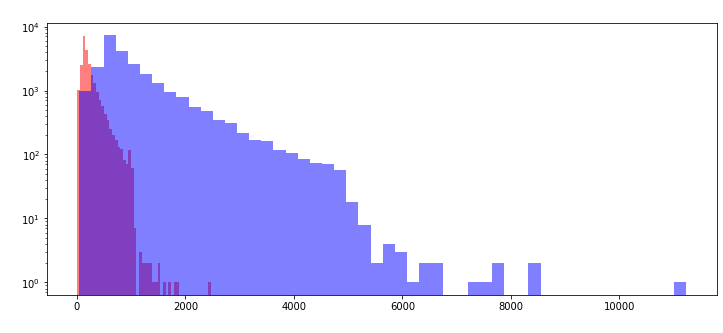

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))
plt.hist(review_len_by_token, bins = 50, alpha = 0.5, color = 'r', label = 'word')
plt.hist(review_len_by_eumjeol, bins = 50, alpha = 0.5, color = 'b', label = 'alphabet')
plt.yscale('log', nonposy = 'clip')
plt.title('Review Lenth Histogram', color = 'white')
plt.xlabel('Review length', color = 'white')
plt.ylabel('Number of reviews', color = 'white')

In [53]:
import numpy as np

print('문장 최대 길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소 길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균 길이: {}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {}'.format(np.median(review_len_by_token)))
print('제1사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제3사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대 길이: 2470
문장 최소 길이: 10
문장 평균 길이: 233.7872
문장 길이 표준편차: 173.72955740506566
문장 중간 길이: 174.0
제1사분위 길이: 127.0
제3사분위 길이: 284.0


Text(0.5, 1.0, 'Word Frequency of Sentences')

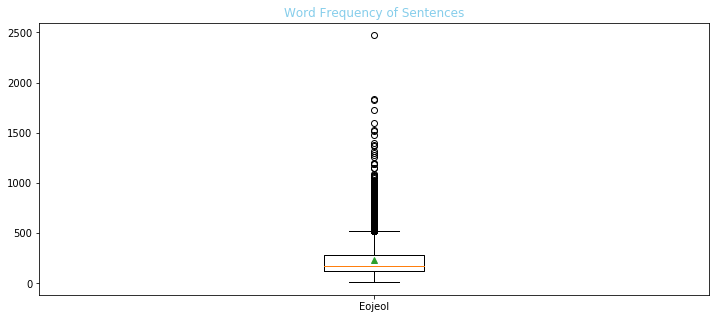

In [60]:
plt.figure(figsize = (12,5))
plt.boxplot([review_len_by_token],
           labels = ['Eojeol'],
           showmeans = True)
plt.title('Word Frequency of Sentences', color = 'skyblue')

Text(0.5, 1.0, 'Alphabet Frequency of Sentences')

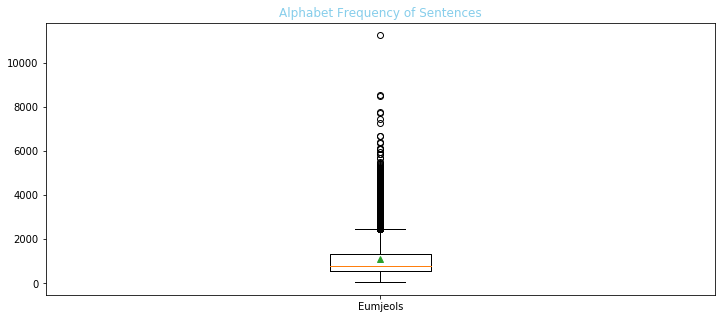

In [63]:
plt.figure(figsize = (12, 5))
plt.boxplot([review_len_by_eumjeol],
           labels = ['Eumjeols'],
           showmeans = True)
plt.title('Alphabet Frequency of Sentences', color = 'skyblue')

{'whiskers': [<matplotlib.lines.Line2D at 0x203184b5f08>,
 'caps': [<matplotlib.lines.Line2D at 0x203184b9b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x203184b5848>,
 'medians': [<matplotlib.lines.Line2D at 0x203184b9d08>,
 'fliers': [<matplotlib.lines.Line2D at 0x203184c0c88>,
 'means': []}

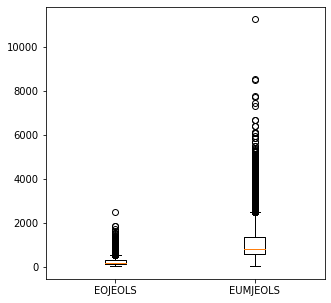

In [68]:
plt.figure(figsize = (5, 5))
plt.boxplot([review_len_by_token, review_len_by_eumjeol], labels = ['EOJEOLS','EUMJEOLS'])

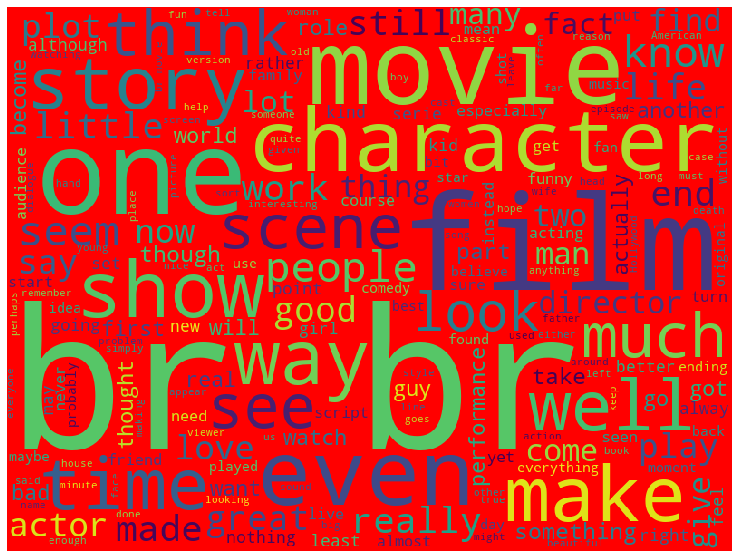

In [72]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'red', width = 800,
                     height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

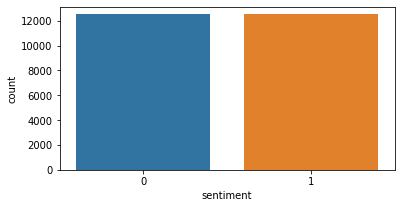

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])